# Wavefunction plots

Here are some plots and code related to the PHAS0004: Atoms, Stars and the Universe course as taught in 2020 to the first year students of UCL Physics and Astronomy.

In [1]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
import math 

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

## Our first wavefunction

The first wavefunction we introduced was a piecewise function that satisifed the following:
$$\psi(x)=\begin{cases}
\sin(\pi x) & \text{if } 0 \leq x \leq 2 \\
0 & \text{otherwise}
\end{cases}$$

We will use the python numpy library to code up this function using the piecewise method. Note that the $x$ below will refer to an array of numbers rather than just a single number, which means we have to be careful how we define the conditions and the function.

In [2]:
#Define a function which will operate on an array of x values all at once
def sinpix(x):
    conds = [x < 0, (x >= 0) & (x <= 2), x > 2]   #The three regions of x
    funcs = [lambda x: 0, lambda x: np.sin(math.pi*x),  # sin(pi x) in the middle and 0 outsides
            lambda x: 0]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it

In [3]:
#Now we will use the linspace function to get 100 numbers
# linearly spaced between -2 and 4
x = np.linspace(-2, 4, 100)
print("x=",x)  #Just print the numbers, since -2 and 4 are in the 100 numbers the step size is not 0.06
print("sinpix(x)=",sinpix(x)) #Print the wavefunction numbers

x= [-2.         -1.93939394 -1.87878788 -1.81818182 -1.75757576 -1.6969697
 -1.63636364 -1.57575758 -1.51515152 -1.45454545 -1.39393939 -1.33333333
 -1.27272727 -1.21212121 -1.15151515 -1.09090909 -1.03030303 -0.96969697
 -0.90909091 -0.84848485 -0.78787879 -0.72727273 -0.66666667 -0.60606061
 -0.54545455 -0.48484848 -0.42424242 -0.36363636 -0.3030303  -0.24242424
 -0.18181818 -0.12121212 -0.06060606  0.          0.06060606  0.12121212
  0.18181818  0.24242424  0.3030303   0.36363636  0.42424242  0.48484848
  0.54545455  0.60606061  0.66666667  0.72727273  0.78787879  0.84848485
  0.90909091  0.96969697  1.03030303  1.09090909  1.15151515  1.21212121
  1.27272727  1.33333333  1.39393939  1.45454545  1.51515152  1.57575758
  1.63636364  1.6969697   1.75757576  1.81818182  1.87878788  1.93939394
  2.          2.06060606  2.12121212  2.18181818  2.24242424  2.3030303
  2.36363636  2.42424242  2.48484848  2.54545455  2.60606061  2.66666667
  2.72727273  2.78787879  2.84848485  2.90909091  

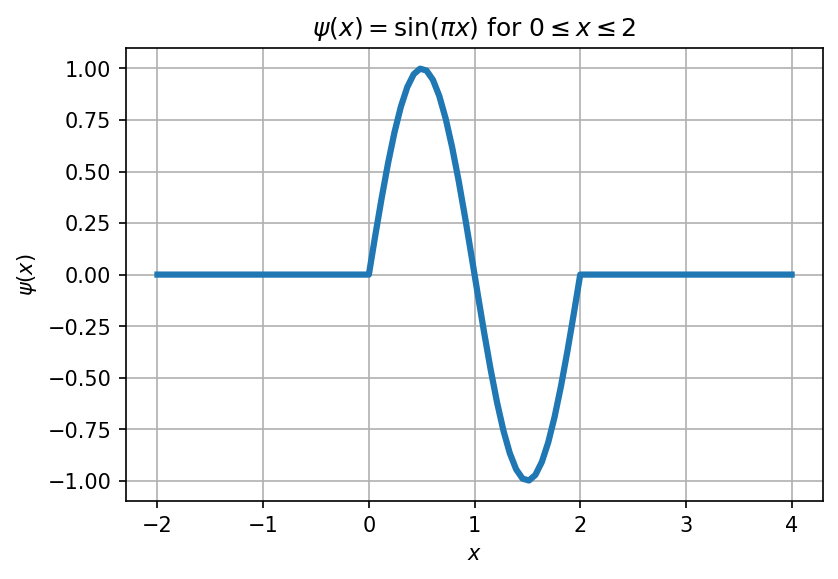

In [4]:
#Now let's create out first plot
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.plot(x,sinpix(x),linewidth=3) #Plot x vs sin (pi x)
ax.set_title(r"$\psi(x)=\sin(\pi x)$ for $0\leq x \leq 2$")  #Set the title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid

### Probability density
We saw in the lectures that the probability density associated with the waveform is:
$$ \rho(x) = \left| \psi(x) \right|^2$$
so in our case we have
$$\rho(x)=\left| \psi(x) \right|^2 =\begin{cases}
\sin^2(\pi x) & \text{if } 0 \leq x \leq 2 \\
0 & \text{otherwise}
\end{cases}$$

So now we can plot this function

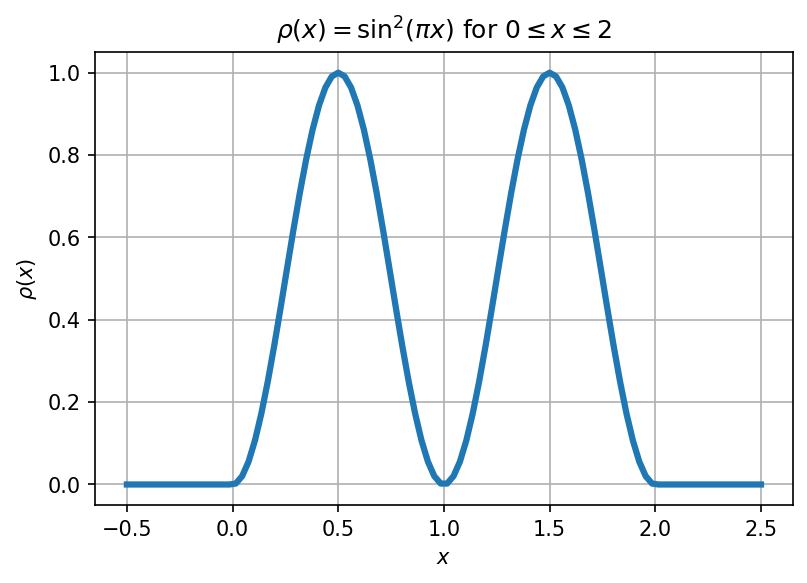

In [5]:
#Now let's create our next plot, and zoom in to the non-zero region
x = np.linspace(-0.5, 2.5, 100)  # Return an array of 100 numbers linearly spaced between -0.5 and 2.5
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.plot(x,sinpix(x)**2,linewidth=3)  # Plot x vs sin^2 (pi x)
ax.set_title(r"$\rho(x)=\sin^2(\pi x)$ for $0\leq x \leq 2$")  # Set the title
ax.set_xlabel("$x$")  # Set the x-axis label
ax.set_ylabel(r"$\rho(x)$")  # Set the y-axis label
ax.grid() # Draw a grid

## de Broglie Wavefunctions

In the lecture we saw that our toy wavefunctions above are actually examples of de Broglie wavefunctions which represent particles in 1-D space with momentum $p$:
$$ \psi(x) = \sin \left( \frac{p x}{\hbar} \right) $$

(-20, 20)

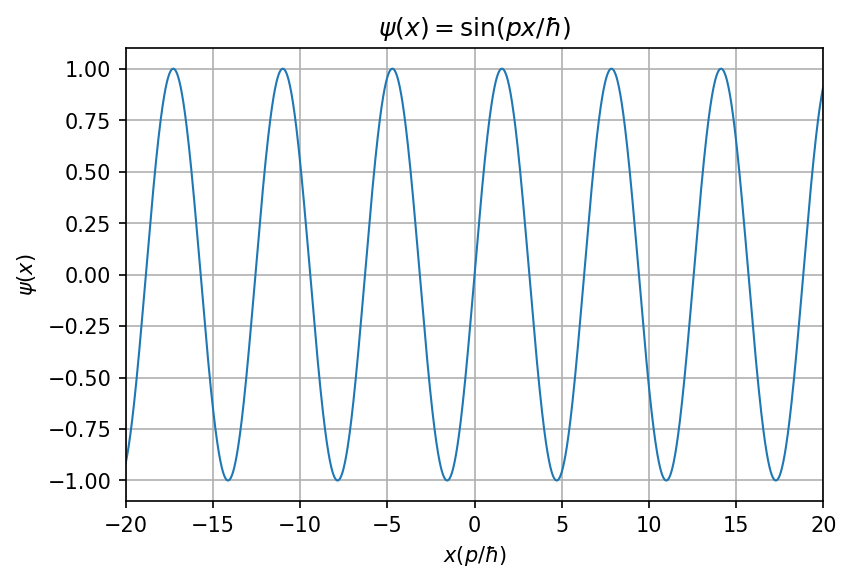

In [6]:
#Now let's create our next plot, and zoom in to the non-zero region
x = np.linspace(-20, 20, 2000)  # Get 2000 numbers linearly spaced between -20 and 20
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.plot(x,np.sin(x),linewidth=1)  # Plot x vs sin x
ax.set_title(r"$\psi(x)=\sin(p x / \hbar)$")  # Set the title
ax.set_xlabel("$x (p/\hbar)$")  # Set the x-axis label
ax.set_ylabel("$\psi(x)$") # Set the y-axis label
ax.grid()  # Draw a grid
ax.set_xlim(-20,20)  # Set the x-axis limits to be -20, 20 

## Can you normalise a de Broglie wavefunction
This wavefunction is defined as a sin function for all values of $x$. So the probability density will also be defined for all values of $x$:
$$ \rho(x) = \sin \left( \frac{p x}{\hbar} \right)^2 $$
and will be positive definite for all values (except for when it is 0).

Which means that if we integrate this wavefunction from $-\infty$ to $+\infty$ the area under the curve will be $\infty$!!!

(-20, 20)

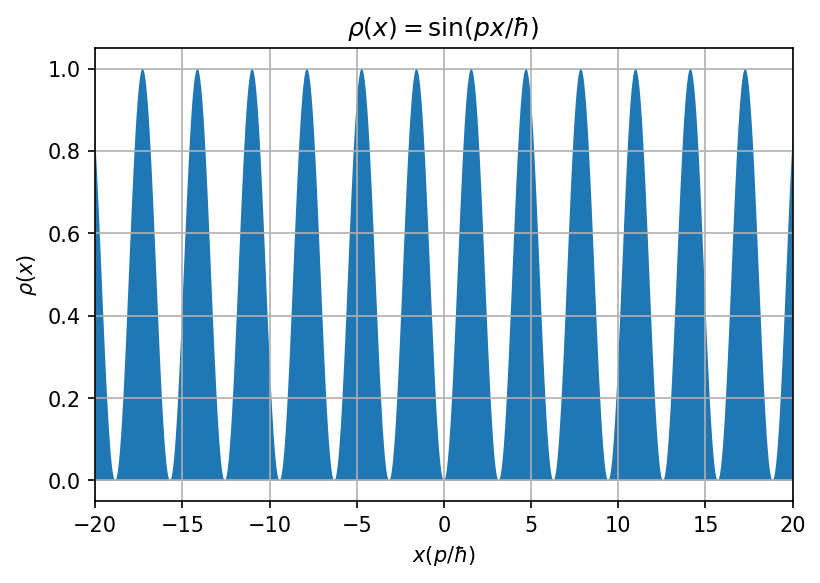

In [7]:
#Obviously this plot isn't infinite... but if it were then the area under the curve would be infinite
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-20, 20, 2000) # Get 2000 numbers linearly spaced between -20 and 20
ax.fill_between(x,y1=np.sin(x)**2,y2=0) # Draw a filled area between 0 and sin^2 x
ax.set_title(r"$\rho(x)=\sin(p x / \hbar)$ ") # Set the title
ax.set_xlabel(r"$x (p/\hbar)$") # Set the x-axis label
ax.set_ylabel(r"$\rho(x)$") # Set the y-axis label
ax.grid() # Draw a grid
ax.set_xlim(-20,20) # Set the x-axis limits to be -20, 20 

## Wavepackets

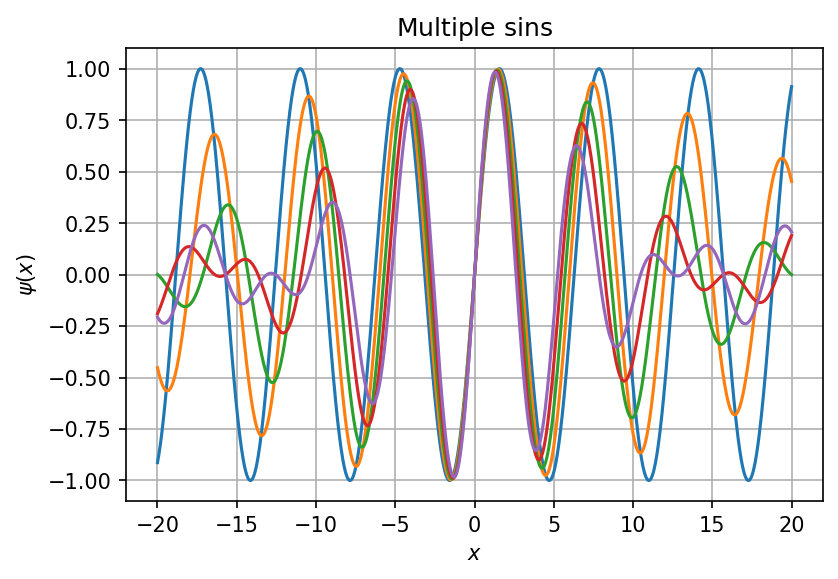

In [8]:
# Define a function which will add n sine waves
# The first sine wave will be sin (x)
# The second (if n>0) will be sin (x * (1-delta) )
# The third (if n>1) will be sin (x * (1-2*delta) ) and so on
def addSin(x,n,delta):
    y=np.sin(x)  # Here is the contribution from sin(x)
    f=1  # Initial frequency
    if n>0:  # If n>0 add in addtional waves
        for i in range(n):  # Loop over n
            f=f-delta  # Get new frequency
            y=y+np.sin(f*x) # Add new wave to y
    return y/(n+1)  # Divide y by (n+1)

fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-20, 20, 2000) # Get 2000 numbers linearly spaced between -20 and 20
numSines=5 # Define the number of sines we want to plot
delta=-0.1 # Define the frequency difference between sines
for i in range(numSines): # Loop over number of sines
    ax.plot(x,addSin(x,i,delta))  #Plot x vs addSin(x,i,delta)
ax.set_title(r"Multiple $\sin$s")  # Set the plot title
ax.set_xlabel("$x$") # Set the x-axis label
ax.set_ylabel(r"$\psi(x)$") # Set the y-axis label
ax.grid() # Draw a grid
